In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#form https://buzzorange.com/techorange/2017/12/18/how-to-use-python-predict-bitcoin/

In [6]:
#pd.read_html('https://stock-ai.com/cryptoCurrency')

In [7]:
import os 
import numpy as np 
import pandas as pd 
import pickle 
import quandl 
from datetime import datetime

In [8]:
def get_quandl_data(quandl_id): 
    """Download and cache Quandl dataseries""" 
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)
        print("Loaded {} from cache".format(quandl_id)) 
    except (OSError, IOError) as e: 
        print("Downloading {} from Quandl’.format(quandl_id)") 
        df = quandl.get(quandl_id, returns="pandas") 
        df.to_pickle(cache_path) 
        print("Cached {} at {}’.format(quandl_id, cache_path)")
    return df

In [9]:
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.figure_factory as ff 
py.init_notebook_mode(connected=True)

In [10]:
# Pull Kraken BTC price exchange data 
btc_usd_price_kraken = get_quandl_data("BCHARTS/KRAKENUSD")

Loaded BCHARTS/KRAKENUSD from cache


In [11]:
btc_usd_price_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
p = LinearRegression()

In [14]:
df=btc_usd_price_kraken.copy()

In [15]:
df = df.reset_index()

In [16]:
df['number']=range(0,len(df.Open))

In [17]:
number=np.array(df.number).reshape(-1,1)
prize=np.array(df.Close).reshape(-1,1)
volume=np.array(df['Volume (Currency)']).reshape(-1,1)
PV=np.concatenate((prize,volume),axis=1)

In [18]:
number_train,number_test, PV_train, PV_test=train_test_split(number,PV,test_size=0.3,random_state=87)

In [19]:
p.fit(number_train,PV_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
result = p.predict(number_test)

In [21]:
PR,VR=zip(*result)
PRT,VRT=zip(*PV_test)

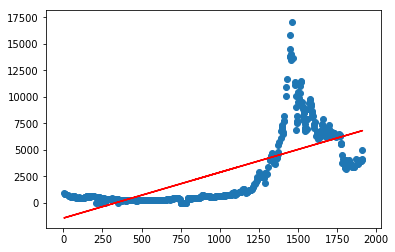

In [22]:
plt.plot(number_test,PR,'r')
plt.scatter(number_test,PRT)

In [24]:
number_train

array([[1405],
       [ 416],
       [1751],
       ...,
       [ 699],
       [ 333],
       [1510]])